In [1]:
# for import from parent directory
import sys, os
sys.path.append(os.pardir)

In [11]:
!pip install matplotlib seaborn xlrd

    100% |################################| 112kB 1.1MB/s 
You are using pip version 19.0.2, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('seaborn-whitegrid')

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

from sklearn.model_selection import train_test_split

In [30]:
df = pd.read_excel('../data/RNN_dataset.xlsx')
df.head(10)

,TS_H_1,TS_L_1,TS_H_2,TS_L_2,TS_H_3,TS_L_3,TS_H_4,TS_L_4,TS_H_5,TS_L_5,Target_H,Target_L
0,1.0278,1.0054,1.0340,1.0213,1.0402,1.0284,1.0415,1.0272,1.0332,1.0260,1.0251,1.0211
1,1.0340,1.0213,1.0402,1.0284,1.0415,1.0272,1.0332,1.0260,1.0305,1.0211,1.0336,1.0246
2,1.0402,1.0284,1.0415,1.0272,1.0332,1.0260,1.0305,1.0211,1.0341,1.0246,1.0308,1.0261
3,1.0415,1.0272,1.0332,1.0260,1.0305,1.0211,1.0341,1.0246,1.0370,1.0261,1.0260,1.0237
4,1.0332,1.0260,1.0305,1.0211,1.0341,1.0246,1.0370,1.0261,1.0316,1.0237,1.0122,1.0114
5,1.0305,1.0211,1.0341,1.0246,1.0370,1.0261,1.0316,1.0237,1.0275,1.0114,1.0119,1.0069
6,1.0341,1.0246,1.0370,1.0261,1.0316,1.0237,1.0275,1.0114,1.0148,1.0069,1.0152,1.0072
7,1.0370,1.0261,1.0316,1.0237,1.0275,1.0114,1.0148,1.0069,1.0154,1.0072,1.0125,1.0085
8,1.0316,1.0237,1.0275,1.0114,1.0148,1.0069,1.0154,1.0072,1.0165,1.0085,1.0167,1.0073
9,1.0275,1.0114,1.0148,1.0069,1.0154,1.0072,1.0165,1.0085,1.0188,1.0073,1.0087,1.0050


## Prepare data

In [31]:
X = df.iloc[:, :10].values
X

array([[1.0278 , 1.0054 , 1.034  , ..., 1.0272 , 1.0332 , 1.026  ],
       [1.034  , 1.0213 , 1.0402 , ..., 1.026  , 1.0305 , 1.0211 ],
       [1.0402 , 1.0284 , 1.0415 , ..., 1.0211 , 1.0341 , 1.0246 ],
       ...,
       [1.14967, 1.13092, 1.14118, ..., 1.13938, 1.14835, 1.1421 ],
       [1.14118, 1.13374, 1.14189, ..., 1.1421 , 1.15567, 1.1435 ],
       [1.14189, 1.13446, 1.14814, ..., 1.1435 , 1.15687, 1.14834]])

In [32]:
# reshape X to 5 timestep with 2 features (hight, low)
X = X.reshape(-1, 5, 2)
X

array([[[1.0278 , 1.0054 ],
        [1.034  , 1.0213 ],
        [1.0402 , 1.0284 ],
        [1.0415 , 1.0272 ],
        [1.0332 , 1.026  ]],

       [[1.034  , 1.0213 ],
        [1.0402 , 1.0284 ],
        [1.0415 , 1.0272 ],
        [1.0332 , 1.026  ],
        [1.0305 , 1.0211 ]],

       [[1.0402 , 1.0284 ],
        [1.0415 , 1.0272 ],
        [1.0332 , 1.026  ],
        [1.0305 , 1.0211 ],
        [1.0341 , 1.0246 ]],

       ...,

       [[1.14967, 1.13092],
        [1.14118, 1.13374],
        [1.14189, 1.13446],
        [1.14814, 1.13938],
        [1.14835, 1.1421 ]],

       [[1.14118, 1.13374],
        [1.14189, 1.13446],
        [1.14814, 1.13938],
        [1.14835, 1.1421 ],
        [1.15567, 1.1435 ]],

       [[1.14189, 1.13446],
        [1.14814, 1.13938],
        [1.14835, 1.1421 ],
        [1.15567, 1.1435 ],
        [1.15687, 1.14834]]])

In [33]:
Y = df.iloc[:, 10:].values
Y

array([[1.0251 , 1.0211 ],
       [1.0336 , 1.0246 ],
       [1.0308 , 1.0261 ],
       ...,
       [1.15412, 1.1435 ],
       [1.14988, 1.14834],
       [1.14716, 1.1457 ]])

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

## Prepare Model

In [37]:
K.clear_session()
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(units = 2))
model.compile(optimizer = 'adam', loss = 'mean_squared_error', )
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 5, 50)             10600     
_________________________________________________________________
dropout (Dropout)            (None, 5, 50)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 5, 50)             20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 50)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 2)                 102       
Total para

In [39]:
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
4039/4039 [==============================] - 5s 1ms/step - loss: 0.1783
Epoch 2/100
4039/4039 [==============================] - 2s 476us/step - loss: 0.0226
Epoch 3/100
4039/4039 [==============================] - 2s 476us/step - loss: 0.0185
Epoch 4/100
4039/4039 [==============================] - 2s 483us/step - loss: 0.0170
Epoch 5/100
4039/4039 [==============================] - 2s 480us/step - loss: 0.0151
Epoch 6/100
4039/4039 [==============================] - 2s 479us/step - loss: 0.0137
Epoch 7/100
4039/4039 [==============================] - 2s 480us/step - loss: 0.0130
Epoch 8/100
4039/4039 [==============================] - 2s 480us/step - loss: 0.0122
Epoch 9/100
4039/4039 [==============================] - 2s 492us/step - loss: 0.0110
Epoch 10/100
4039/4039 [==============================] - 2s 478us/step - loss: 0.0102
Epoch 11/100
4039/4039 [==============================] - 2s 472us/step - loss: 0.0104
Epoch 12/100
4039/4039 [==============================

In [40]:
y_pred = model.predict(X_test)

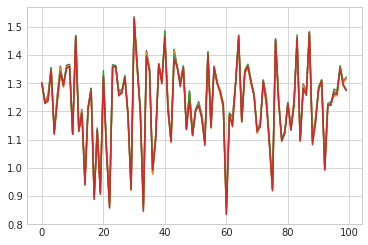

In [45]:
plt.plot(y_pred[:100])
plt.plot(y_test[:100])